In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, BatchNormalization, UpSampling2D, Dense, MaxPool2D, LeakyReLU, Reshape, Dropout, Flatten
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K
import tensorflow as tf

import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import time

In [2]:
# df = pd.read_csv('./CUB_200_2011/CUB_200_2011/images.txt', delim_whitespace=True, header=None)
# df = df.drop(0, 1)

In [3]:
# df.columns = ['path']

In [4]:
# df.path[0]

'001.Black_footed_Albatross/Black_Footed_Albatross_0046_18.jpg'

In [5]:
# df[['class', 'junk']] = df['path'].str.split('/', expand=True)

In [6]:
# df[['class_number', 'junk']] = df['class'].str.split('.', expand=True)

In [7]:
# df['image_number'] = df.index + 1

In [8]:
# df = df.drop('junk', 1)

In [9]:
# def normalize_img(img):
#     return (img - 127.5)/127.5

# def unnormalize_img(img):
#     return (img + 1.) / 2.

In [10]:
# train_datagen = ImageDataGenerator(preprocessing_function=normalize_img)

In [11]:
# train_generator = train_datagen.flow_from_dataframe(
#         dataframe=df,
#         directory='./CUB_200_2011/CUB_200_2011/images/',
#         x_col="path",
#         y_col="class_number",
#         target_size=(64, 64),
#         batch_size=32,
#         class_mode='categorical',
#         save_to_dir='./CUB_200_2011/CUB_200_2011/images-cleaned/')

Found 11788 validated image filenames belonging to 200 classes.


In [20]:
# for cls in df['class'].unique():
#     path = './CUB_200_2011/CUB_200_2011/images-cleaned/' + str(cls)
#     if not os.path.exists(path):
#         os.makedirs(path)

In [29]:
# for cls in df['class'].unique():
#     path = './CUB_200_2011/CUB_200_2011/images-cleaned/' + str(cls)
#     train_generator = train_datagen.flow_from_dataframe(
#         dataframe=df,
#         directory='./CUB_200_2011/CUB_200_2011/images/',
#         x_col="path",
#         y_col="class",
#         target_size=(64, 64),
#         batch_size=100,
#         class_mode='categorical',
#         classes = [str(cls)],
#         save_to_dir=path)
#     train_generator.next()

Found 60 validated image filenames belonging to 1 classes.
Found 60 validated image filenames belonging to 1 classes.
Found 58 validated image filenames belonging to 1 classes.
Found 60 validated image filenames belonging to 1 classes.
Found 44 validated image filenames belonging to 1 classes.
Found 41 validated image filenames belonging to 1 classes.
Found 53 validated image filenames belonging to 1 classes.
Found 48 validated image filenames belonging to 1 classes.
Found 59 validated image filenames belonging to 1 classes.
Found 60 validated image filenames belonging to 1 classes.
Found 60 validated image filenames belonging to 1 classes.
Found 56 validated image filenames belonging to 1 classes.
Found 60 validated image filenames belonging to 1 classes.
Found 60 validated image filenames belonging to 1 classes.
Found 58 validated image filenames belonging to 1 classes.
Found 58 validated image filenames belonging to 1 classes.
Found 57 validated image filenames belonging to 1 classe

Found 60 validated image filenames belonging to 1 classes.
Found 58 validated image filenames belonging to 1 classes.
Found 60 validated image filenames belonging to 1 classes.
Found 60 validated image filenames belonging to 1 classes.
Found 60 validated image filenames belonging to 1 classes.
Found 60 validated image filenames belonging to 1 classes.
Found 60 validated image filenames belonging to 1 classes.
Found 60 validated image filenames belonging to 1 classes.
Found 60 validated image filenames belonging to 1 classes.
Found 59 validated image filenames belonging to 1 classes.
Found 60 validated image filenames belonging to 1 classes.
Found 51 validated image filenames belonging to 1 classes.
Found 60 validated image filenames belonging to 1 classes.
Found 59 validated image filenames belonging to 1 classes.
Found 60 validated image filenames belonging to 1 classes.
Found 60 validated image filenames belonging to 1 classes.
Found 60 validated image filenames belonging to 1 classe

In [41]:
train_imgs = []
import os
for root, dirs, files in os.walk("./CUB_200_2011/CUB_200_2011/images-cleaned/", topdown=False):
    for name in files:
        train_imgs.append(cv2.imread(os.path.join(root, name)))

train_imgs = np.array(train_imgs)
train_imgs = (train_imgs - 127.5)/127.5

In [44]:
def make_generator_model(shape):
    
    input_layer = Input(shape=shape)
    
    x = Dense(8*8*64)(input_layer)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    
    x = Reshape((8, 8, 64))(x)
    
    x = Conv2DTranspose(32, (5, 5), strides=(2, 2), padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    
    x = Conv2DTranspose(16, (5, 5), strides=(2, 2), padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    
    x = Conv2DTranspose(3, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh')(x)
    
    return Model(input_layer, x)

In [45]:
generator = make_generator_model((200,))
generator.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200)]             0         
_________________________________________________________________
dense (Dense)                (None, 4096)              823296    
_________________________________________________________________
batch_normalization (BatchNo (None, 4096)              16384     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 4096)              0         
_________________________________________________________________
reshape (Reshape)            (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 16, 16, 32)        51200     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 32)        128   

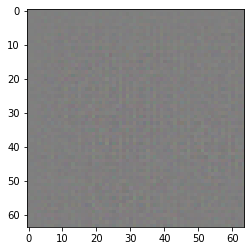

In [46]:
generator = make_generator_model((200,))

noise = np.random.normal(0, 1, 200)

generated_image = generator.predict(np.array([noise]))[0]
plt.imshow(unnormalize_img(generated_image), )

In [47]:
def make_discriminator_model():
    input_layer = Input((64, 64, 3))
    
    x = Conv2D(64, (5, 5), strides=(2, 2), padding='same')(input_layer)
    x = LeakyReLU()(x)
    x = Dropout(0.3)(x)
    
    x = Conv2D(128, (5, 5), strides=(2, 2), padding='same')(x)
    x = LeakyReLU()(x)
    x = Dropout(0.3)(x)
    
    x = Flatten()(x)
    x = Dense(1)(x)
    
    return Model(input_layer, x)

In [48]:
discriminator = make_discriminator_model()
discriminator.summary()
decision = discriminator.predict(np.array([generated_image]))
print (decision)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 64)        4864      
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 32, 32, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       204928    
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 16, 16, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 128)       0   

In [49]:
cross_entropy = BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [50]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [51]:
generator_optimizer = Adam(1e-4)
discriminator_optimizer = Adam(1e-4)

In [52]:
@tf.function
def train_step(images):
    noise = tf.random.normal([32, 200])
    
    gen_losses = []
    disc_losses = []

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)
        
        gen_losses.append(K.mean(gen_loss))
        disc_losses.append(K.mean(disc_loss))

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
    
    return (gen_losses, disc_losses)

In [55]:
def train(train_generator, epochs):
    num_imgs = len(train_imgs)
    for epoch in range(epochs):
        start = time.time()
        
        gen_loss_epoch = [1, 0]
        disc_loss_epoch = [1, 0]
        
        np.random.shuffle(train_imgs)
        
        for i in range(0, num_imgs, 32):
            gen_loss_batch, disc_loss_batch = train_step(train_imgs[i:(i+32)%num_imgs])

            gen_loss_epoch[0] += 1
            disc_loss_epoch[0] += 1
            gen_loss_epoch[1] += np.mean(gen_loss_batch)
            disc_loss_epoch[1] += np.mean(disc_loss_batch)

        print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))
        print(f'Gen loss: {gen_loss_epoch[1]/gen_loss_epoch[0]}, Disc loss: {disc_loss_epoch[1]/disc_loss_epoch[0]}')


In [70]:
train(train_generator, 400)

Time for epoch 1 is 6.9840710163116455 sec
Gen loss: 3.6485329006169294, Disc loss: 0.465740686695318
Time for epoch 2 is 6.989253759384155 sec
Gen loss: 3.745851418778703, Disc loss: 0.423491735635577
Time for epoch 3 is 7.003578186035156 sec
Gen loss: 3.6337241598077723, Disc loss: 0.4523428918542089
Time for epoch 4 is 7.031939268112183 sec
Gen loss: 3.6801369621947004, Disc loss: 0.38058165511166725
Time for epoch 5 is 7.043640613555908 sec
Gen loss: 3.467220857014527, Disc loss: 0.4157349912097325
Time for epoch 6 is 7.0639567375183105 sec
Gen loss: 3.4811661275657446, Disc loss: 0.36315091336901123
Time for epoch 7 is 7.066332817077637 sec
Gen loss: 3.461722979030094, Disc loss: 0.4086561509382886
Time for epoch 8 is 7.063220739364624 sec
Gen loss: 3.5635949173489134, Disc loss: 0.39680084358598733
Time for epoch 9 is 7.085125923156738 sec
Gen loss: 3.41623438886694, Disc loss: 0.4726232937864355
Time for epoch 10 is 7.1277077198028564 sec
Gen loss: 3.560796826916772, Disc loss: 

Time for epoch 81 is 7.240440368652344 sec
Gen loss: 3.7146835240157876, Disc loss: 0.3115947030988094
Time for epoch 82 is 7.245681047439575 sec
Gen loss: 3.7362328857988927, Disc loss: 0.31382750718778857
Time for epoch 83 is 7.257730960845947 sec
Gen loss: 5.4030147120759295, Disc loss: 0.3276377174512458
Time for epoch 84 is 7.321102142333984 sec
Gen loss: 3.9481830416498958, Disc loss: 0.4123904329296705
Time for epoch 85 is 7.3097968101501465 sec
Gen loss: 3.9180617809295653, Disc loss: 0.29739406183362005
Time for epoch 86 is 7.3193135261535645 sec
Gen loss: 3.6342227156097824, Disc loss: 0.2765190760831575
Time for epoch 87 is 7.198984146118164 sec
Gen loss: 3.648823811556842, Disc loss: 0.2989525688862478
Time for epoch 88 is 7.3033363819122314 sec
Gen loss: 3.82630159017202, Disc loss: 0.30988807219105796
Time for epoch 89 is 7.347977638244629 sec
Gen loss: 4.118895957276628, Disc loss: 0.2803127801196801
Time for epoch 90 is 7.24352765083313 sec
Gen loss: 3.736465495341533, 

Time for epoch 161 is 7.518467426300049 sec
Gen loss: 3.385954217653017, Disc loss: 0.38732097977520646
Time for epoch 162 is 7.237217903137207 sec
Gen loss: 3.353061456293673, Disc loss: 0.3844530753388598
Time for epoch 163 is 7.247483015060425 sec
Gen loss: 3.414204631624995, Disc loss: 0.37417262559001513
Time for epoch 164 is 7.442615509033203 sec
Gen loss: 3.4649768416946, Disc loss: 0.37761688045150527
Time for epoch 165 is 7.274539232254028 sec
Gen loss: 3.4947380578195726, Disc loss: 0.349000625674789
Time for epoch 166 is 7.445728063583374 sec
Gen loss: 3.4342157180244857, Disc loss: 0.38046204435664255
Time for epoch 167 is 7.207146883010864 sec
Gen loss: 3.4173191940462266, Disc loss: 0.390743702186926
Time for epoch 168 is 7.28376579284668 sec
Gen loss: 3.403480933163617, Disc loss: 0.3347650649076378
Time for epoch 169 is 7.3604230880737305 sec
Gen loss: 3.404287574097917, Disc loss: 0.3780527455983935
Time for epoch 170 is 7.366538763046265 sec
Gen loss: 3.23526324065955

Time for epoch 240 is 7.316967248916626 sec
Gen loss: 4.518569452053792, Disc loss: 0.3197888969972327
Time for epoch 241 is 7.322106599807739 sec
Gen loss: 4.001206756282497, Disc loss: 0.32674970210001275
Time for epoch 242 is 7.300844192504883 sec
Gen loss: 3.7821476195309613, Disc loss: 0.2790155662978823
Time for epoch 243 is 7.308511734008789 sec
Gen loss: 3.393221863540443, Disc loss: 0.3317918033112545
Time for epoch 244 is 7.340842962265015 sec
Gen loss: 3.369291583267418, Disc loss: 0.31267883548059977
Time for epoch 245 is 7.462528467178345 sec
Gen loss: 3.3182483083493, Disc loss: 0.33629030597371024
Time for epoch 246 is 7.238492727279663 sec
Gen loss: 3.293543775017197, Disc loss: 0.31214898933429974
Time for epoch 247 is 7.367867469787598 sec
Gen loss: 3.314963141647545, Disc loss: 0.3179393884096597
Time for epoch 248 is 7.307464838027954 sec
Gen loss: 3.377550929301494, Disc loss: 0.35242360220164864
Time for epoch 249 is 7.264618396759033 sec
Gen loss: 3.3760250226871

Time for epoch 320 is 7.309071063995361 sec
Gen loss: 4.27955330642494, Disc loss: 0.27861355477692307
Time for epoch 321 is 7.300124645233154 sec
Gen loss: 4.775045125548904, Disc loss: 0.28724531499618616
Time for epoch 322 is 7.323335886001587 sec
Gen loss: 4.360218287803031, Disc loss: 0.2746748488396406
Time for epoch 323 is 7.321998119354248 sec
Gen loss: 4.254153460425299, Disc loss: 0.263389473247367
Time for epoch 324 is 7.306685209274292 sec
Gen loss: 3.9350288036707286, Disc loss: 0.25446862503886225
Time for epoch 325 is 7.305095672607422 sec
Gen loss: 3.764963494764792, Disc loss: 0.2506481880875858
Time for epoch 326 is 7.31235146522522 sec
Gen loss: 3.625169335829245, Disc loss: 0.25295446402317767
Time for epoch 327 is 7.3097968101501465 sec
Gen loss: 3.587562804608732, Disc loss: 0.27821629544770393
Time for epoch 328 is 7.307717800140381 sec
Gen loss: 3.5760047596854134, Disc loss: 0.2752115015443918
Time for epoch 329 is 7.305993556976318 sec
Gen loss: 3.592342225925

Time for epoch 399 is 7.310362815856934 sec
Gen loss: 4.015853640195486, Disc loss: 0.27376651290703463
Time for epoch 400 is 7.306700944900513 sec
Gen loss: 4.0486282071551765, Disc loss: 0.26230852223328643


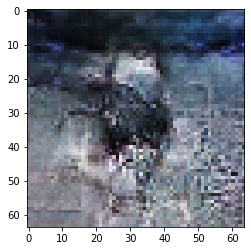

In [82]:
noise = np.random.normal(0, 1, 200)

generated_image = generator.predict(np.array([noise]))[0]
plt.imshow(unnormalize_img(generated_image))

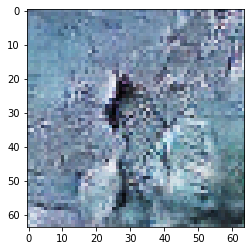

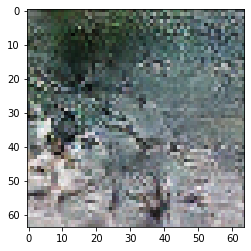

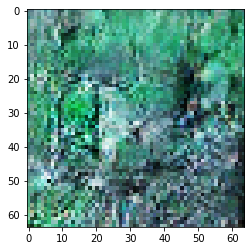

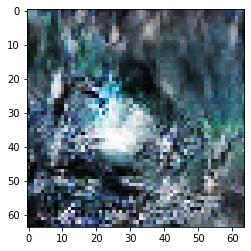

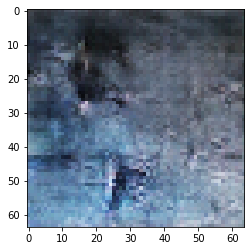

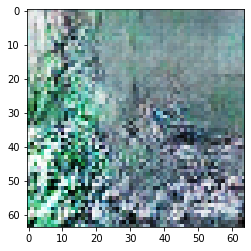

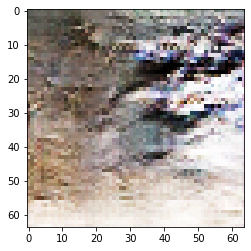

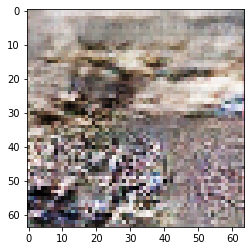

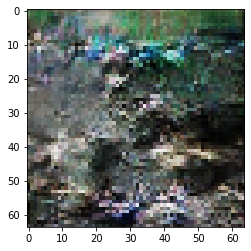

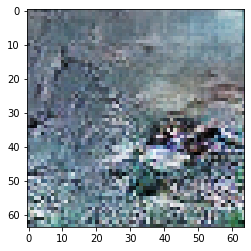

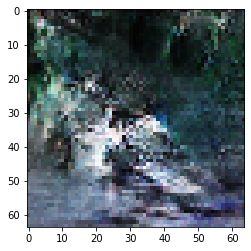

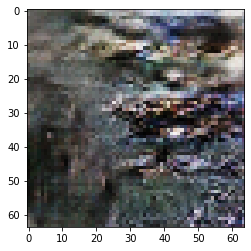

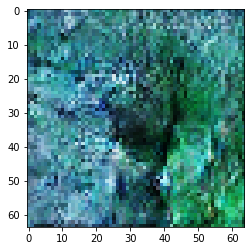

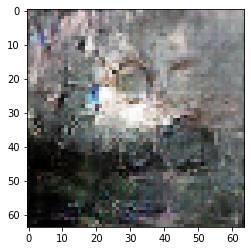

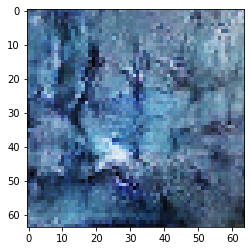

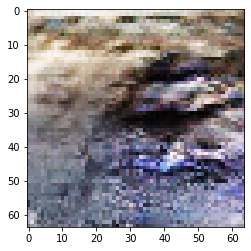

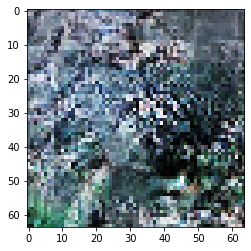

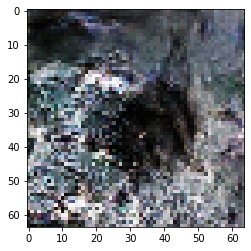

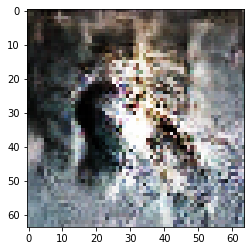

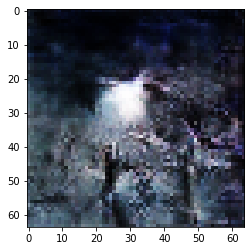

In [117]:
for i in range(20):
    noise = np.random.normal(0, 1, 200)

    generated_image = generator.predict(np.array([noise]))[0]
    plt.imshow(unnormalize_img(generated_image))
    plt.show()

In [118]:
generator.save_weights('./results/gan_gen_plain_500.h5')
discriminator.save_weights('./results/gan_disc_plain_500.h5')